In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Read the dataset into a DataFrame
df = pd.read_csv("./card_transdata.csv")

# Display the first 5 rows of the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [24]:
# Select specific columns of interest
df = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']]

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [25]:
# Check the value counts of the 'fraud' column
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [26]:
# Split the data into features (x) and target (y)
x = df.drop('fraud', axis=1)
y = df['fraud']

In [27]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [28]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [29]:
# Initialize and train a Logistic Regression classifier
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
coef = classifier.coef_[0]
print ("Coeficientes: ", coef)

Coeficientes:  [  0.01496035   0.02401641   0.85710245  -0.61031162  -1.03811235
 -13.10162887   6.57622255]


In [31]:
# Make predictions on the test set
y_predict = classifier.predict(x_test)

# Create a DataFrame to compare actual and predicted values
Results = pd.DataFrame({'Actual': y_test, 'Predictions': y_predict})
Results.head(5)

,Actual,Predictions
276826,0.0,0.0
849425,0.0,0.0
504499,0.0,0.0
601054,0.0,0.0
980221,1.0,0.0


In [32]:
# Calculate and print accuracy on the test set
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

# Calculate and print accuracy on the training set
y_train_predict = classifier.predict(x_train)
print(accuracy_score(y_train, y_train_predict))

# Calculate and print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.95857
0.9587257142857143
[[271789   1874]
 [ 10555  15782]]


Text(95.72222222222221, 0.5, 'True Label')

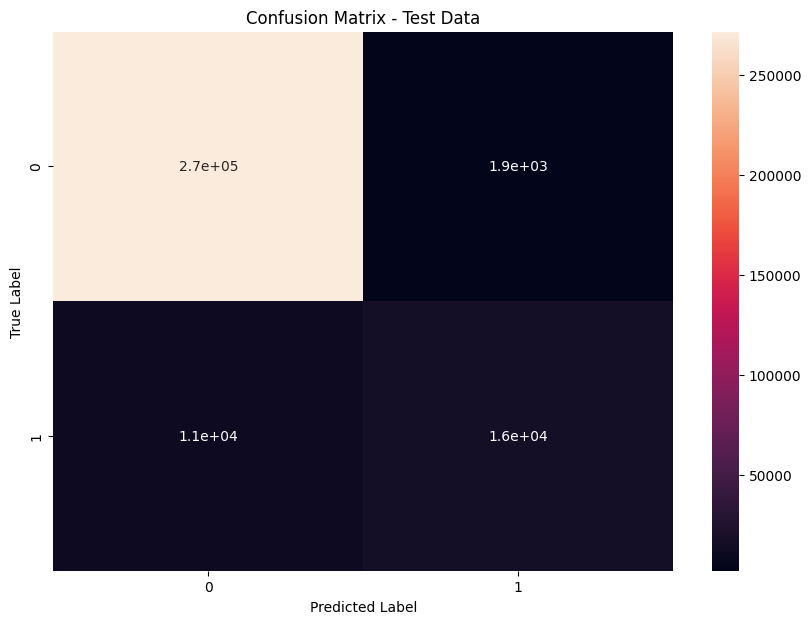

In [33]:
# Visualize the confusion matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

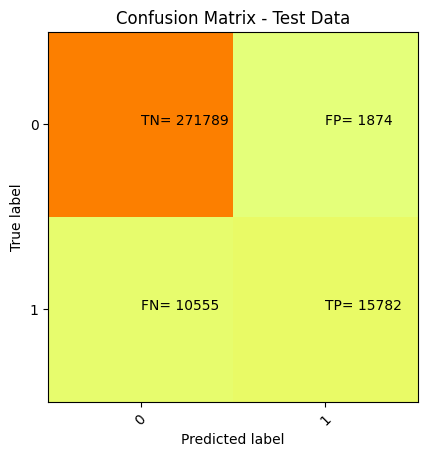

In [34]:
# Create a more detailed confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Add labels and values to the cells of the confusion matrix
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + "= " + str(cm[i][j]))
plt.show()

In [35]:
# Calculate and print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

# Calculate and print recall, precision, specificity, and accuracy
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

recall = TP / (TP + FN)
print('Recall =', recall)

precision = TP / (TP + FP)
print("Precision =", precision)

specificity = TN / (TN + FP)
print("Specificity =", specificity)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy =", accuracy)


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273663
         1.0       0.89      0.60      0.72     26337

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

Recall = 0.599233018187341
Precision = 0.8938604440416855
Specificity = 0.9931521616002164
Accuracy = 0.95857


In [36]:
import pickle

# Save the trained model to a file so we can use it in the api 

with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [37]:
x_columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')